# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.


2. Создайте фрейм данных `df` со столбцами:` uid`, `labname`,` numTrials`, `hour`,` dayofweek`, где `hour` извлекается из` timestamp`, а также `dayofweek` ( «0» - понедельник, «6» - воскресенье). Мы попытаемся предсказать день недели, имея данные о том, какой пользователь совершил фиксацию для какой лаборатории, в какой час и какая попытка была сделана.
3. Используя OneHotEncoder (), преобразуйте ваши категориальные функции, удалите из фрейма данных начальные столбцы.
4. Используйте StandardScaler () для масштабирования непрерывных функций.
5. Сохраните фрейм данных как `dayofweek.csv`.
6. Прежде чем пробовать различные алгоритмы, выясните точность наивных алгоритмов - того, который предсказывает все как самый популярный класс.

Создайте фрейм данных df со столбцами:uid, labname,numTrials, hour,dayofweek, где hour извлекается изtimestamp, а также dayofweek ( «0» - понедельник, «6» - воскресенье). Мы попытаемся предсказать день недели, имея данные о том, какой пользователь

In [2]:
df = pd.read_csv("data/checker_submits.csv")
df['hour'] = pd.DatetimeIndex(df.timestamp).hour
df['dayofweek'] = (df.timestamp.apply(lambda date: pd.to_datetime(date).dayofweek))
df.drop('timestamp', axis=1, inplace=True)
df[['uid', 'labname']] = df[['uid', 'labname']].astype('category')
df.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


In [3]:
target = df['dayofweek']

Используя OneHotEncoder (), преобразуйте ваши категориальные функции, удалите из фрейма данных начальные столбцы.

In [4]:
# cat_data = OneHotEncoder().fit_transform(df[['uid', 'labname']]).toarray()

In [5]:
cat_data = pd.get_dummies(df[['uid', 'labname']], prefix=['uid', 'labname'])

Используйте StandardScaler () для масштабирования непрерывных функций.

In [6]:
ss_data = StandardScaler().fit_transform(df[['numTrials', 'hour']])

In [7]:
dayofweek = pd.concat([cat_data, pd.DataFrame(ss_data, columns=['numTrials', 'hour'])],axis=1)
dayofweek['target'] = target
dayofweek.head()

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.788667,-2.562352,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.756764,-2.562352,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.724861,-2.562352,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.692958,-2.562352,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.661055,-2.562352,4


Сохраните фрейм данных как dayofweek.csv.

In [8]:
# dayofweek.to_csv("../data/dayofweek.csv")

Прежде чем пробовать различные алгоритмы, выясните точность наивных алгоритмов - того, который предсказывает все как самый популярный класс.

In [9]:
dayofweek['target'].value_counts()

3    396
6    356
1    274
5    271
2    149
0    136
4    104
Name: target, dtype: int64

In [10]:
accuracy_score(dayofweek.target, dayofweek.shape[0] * [3])

0.23487544483985764

## LogisticRegression
1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.


1. Обучите логистическую регрессию, для базовой модели используйте random_state = 21, fit_intercept = False.
2. Рассчитайте точность.
3. Напишите функцию, которая рисует график (barh), принимая коэффициенты любых обученных моделей, названия функций и количество самых важных функций top-n для отображения.
4. Нарисуйте график («barh») для базовой модели с 10 наиболее важными характеристиками (абсолютными значениями) для обученной модели.
5. Помните, что это мультиклассовая классификация, и `coef_` возвращает матрицу, чтобы вычислить важность функции, вам нужно просуммировать важность всех отдельных функций для всех целевых значений.

In [11]:
test = dayofweek['target']
train = dayofweek.drop('target', axis = 1)

1. Обучите логистическую регрессию, для базовой модели используйте random_state = 21, fit_intercept = False.


In [12]:
log_model = LogisticRegression(fit_intercept=False, random_state=21)
log_model.fit(train, test)

LogisticRegression(fit_intercept=False, random_state=21)

Рассчитайте точность.

In [13]:
accuracy_score(test, log_model.predict(train))

0.6405693950177936

Напишите функцию, которая рисует график (barh), принимая коэффициенты любых обученных моделей, названия функций и количество самых важных функций top-n для отображения.

In [14]:
def plot_barh(coef, names, top_n, sums= True):
    if sums:
        mas = np.abs(coef).sum(axis=0)
        top_feat = sorted(np.abs(mas), reverse=True)[:top_n]
    else:
        mas = np.abs(coef)
        top_feat = sorted(np.abs(coef), reverse=True)[:top_n]
        
    index = mas.argsort()[-top_n:][::-1]
    df = pd.DataFrame({'lab': names[index], 'val': top_feat})
    ax = df.plot.barh(x='lab', y='val', figsize=(15,8))

Нарисуйте график («barh») для базовой модели с 10 наиболее важными характеристиками (абсолютными значениями) для обученной модели.

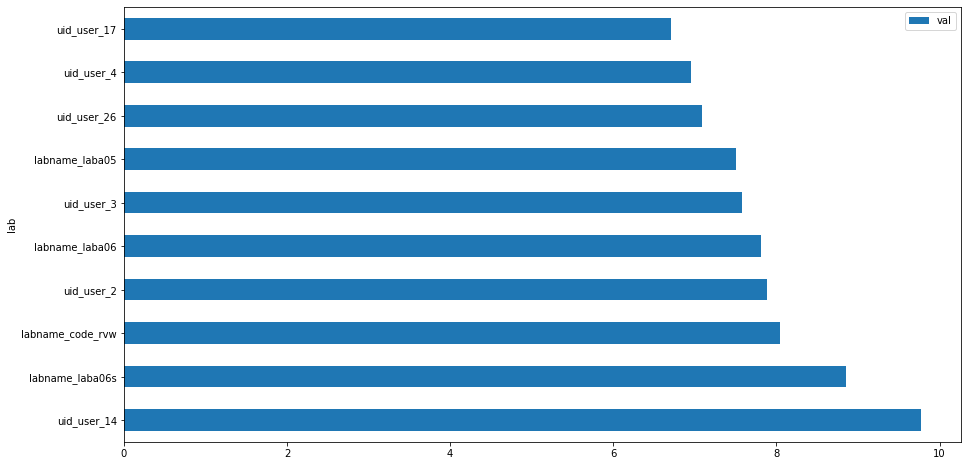

In [15]:
plot_barh(log_model.coef_, dayofweek.columns, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.


1. Обучите модель SVC, в качестве базовой модели используйте параметры kernel = 'linear', 'sizes = True', 'random_state = 21'.
2. Попробуйте разные ядра, посчитайте точность.
3. Нарисуйте график (`barh`) для базовой модели с топ-10 наиболее важных характеристик (абсолютное значение) для обученной модели для линейного ядра *

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 


In [16]:
model_svm_1 = sklearn.svm.SVC(random_state = 21, probability=True, kernel='linear')
model_svm_1.fit(train, test)
accuracy_score(test, model_svm_1.predict(train))

0.702846975088968

2. Try different kernels, calculate the accuracies.


In [17]:
model_svm = sklearn.svm.SVC(random_state = 21, probability=True)
model_svm.fit(train, test)
accuracy_score(test, model_svm.predict(train))

0.8558718861209964

In [18]:
model_svm = sklearn.svm.SVC(random_state = 21, probability=True, kernel= 'sigmoid')
model_svm.fit(train, test)
accuracy_score(test, model_svm.predict(train))

0.3997627520759193

Нарисуйте график (barh) для базовой модели с топ-10 наиболее важных характеристик (абсолютное значение) для обученной модели для линейного ядра 

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


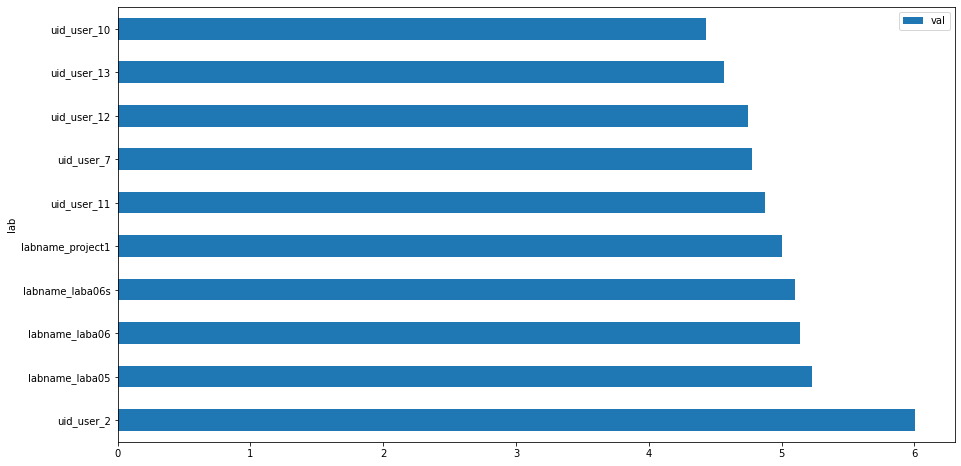

In [19]:
clf = OneVsRestClassifier(model_svm_1).fit(train, test)
plot_barh(clf.coef_, dayofweek.columns, 10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.


1. Обучите DecisionTreeClassifier, используя для базовой модели max_depth = 4, random_state = 21.
2. Попробуйте разные значения max_depth, рассчитайте точность.
3. Нарисуйте график («barh») для базовой модели с топ-10 наиболее важными характеристиками (абсолютными значениями) для обученной модели, используя написанную функцию.

Train a DecisionTreeClassifier using for the baseline model max_depth=4, random_state=21

In [20]:
dtc_model_1 = DecisionTreeClassifier(max_depth = 4, random_state = 21)
dtc_model_1.fit(train, test)
accuracy_score(test, dtc_model_1.predict(train))

0.5516014234875445

Try different values of max_depth, calculate the accuracies.

In [21]:
dtc_model = DecisionTreeClassifier(max_depth = 6, random_state = 21)
dtc_model.fit(train, test)
accuracy_score(test, dtc_model.predict(train))

0.6637010676156584

In [22]:
dtc_model = DecisionTreeClassifier(max_depth = 10, random_state = 21)
dtc_model.fit(train, test)
accuracy_score(test, dtc_model.predict(train))

0.8196915776986952

In [23]:
dtc_model = DecisionTreeClassifier(max_depth = 12, random_state = 21)
dtc_model.fit(train, test)
accuracy_score(test, dtc_model.predict(train))

0.8831553973902728

In [24]:
dtc_model = DecisionTreeClassifier(max_depth = 100, random_state = 21)
dtc_model.fit(train, test)
accuracy_score(test, dtc_model.predict(train))

1.0

Нарисуйте график («barh») для базовой модели с топ-10 наиболее важными характеристиками (абсолютными значениями) для обученной модели, используя написанную функцию.

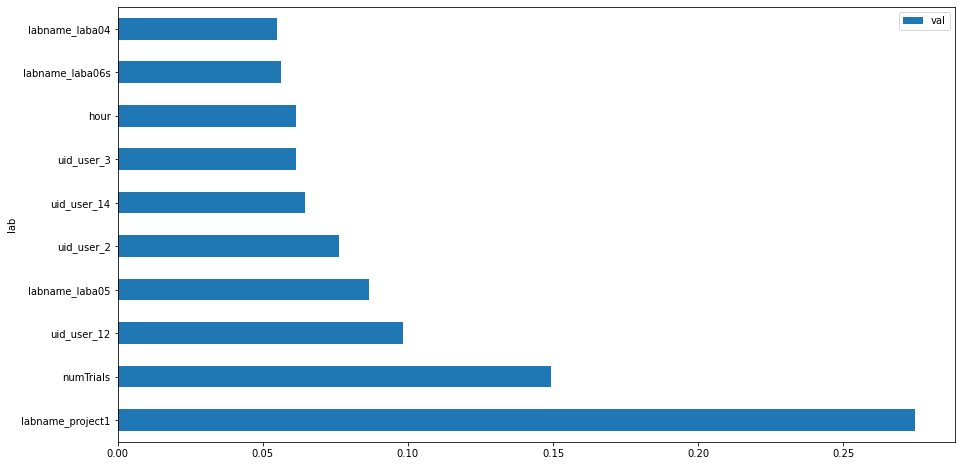

In [25]:
plot_barh(dtc_model_1.feature_importances_, dayofweek.columns, 10, False)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.


1. Обучите `RandomForestClassifier`, используя для базовой модели параметры` n_estimators = 100`, `max_depth = 25`,` random_state = 21`.
2. Попробуйте разные значения max_depth и n_estimators, рассчитайте точность.
3. Нарисуйте график («barh») для базовой модели с топ-10 наиболее важными характеристиками (абсолютными значениями) для обученной модели, используя написанную функцию.

In [32]:
rfc_model_1= RandomForestClassifier(n_estimators = 100, max_depth = 25, random_state = 21)
rfc_model_1.fit(train, test)
accuracy_score(test, rfc_model_1.predict(train))

0.9988137603795967

Попробуйте разные значения max_depth и n_estimators, рассчитайте точность.

In [27]:
rfc_model= RandomForestClassifier(n_estimators = 40, max_depth = 6, random_state = 21)
rfc_model.fit(train, test)
accuracy_score(test, rfc_model.predict(train))

0.6506524317912218

In [28]:
rfc_model= RandomForestClassifier(n_estimators = 40, max_depth = 10, random_state = 21)
rfc_model.fit(train, test)
accuracy_score(test, rfc_model.predict(train))

0.8653618030842231

In [29]:
rfc_model= RandomForestClassifier(n_estimators = 40, max_depth = 12, random_state = 21)
rfc_model.fit(train, test)
accuracy_score(test, rfc_model.predict(train))

0.9193357058125742

In [30]:
rfc_model= RandomForestClassifier(n_estimators = 40, max_depth = 100, random_state = 21)
rfc_model.fit(train, test)
accuracy_score(test, rfc_model.predict(train))

1.0

Нарисуйте график («barh») для базовой модели с топ-10 наиболее важными характеристиками (абсолютными значениями) для обученной модели, используя написанную функцию.

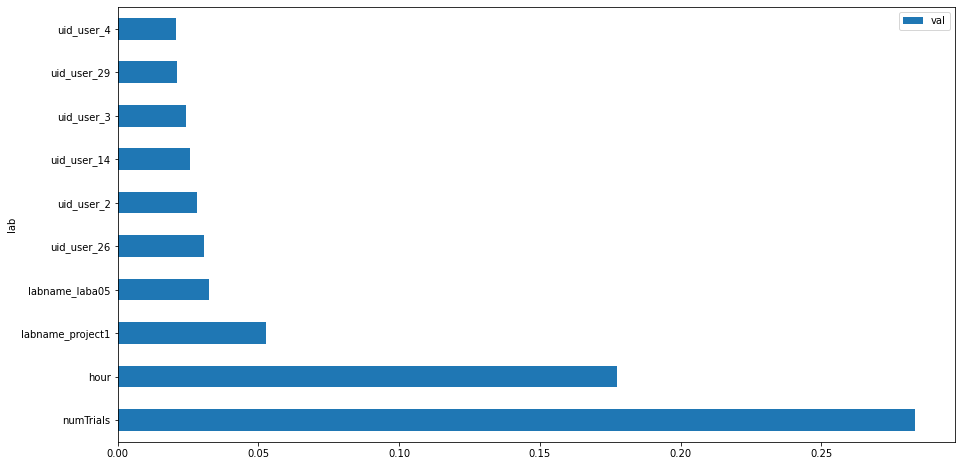

In [31]:
plot_barh(rfc_model_1.feature_importances_, dayofweek.columns, 10, False)